# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

Описание данных

• 	airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

•	balcony — число балконов

•	ceiling_height — высота потолков (м)

•	cityCenters_nearest — расстояние до центра города (м)

•	days_exposition — сколько дней было размещено объявление (от публикации до снятия)

•	first_day_exposition — дата публикации

•	floor — этаж

•	floors_total — всего этажей в доме

•	is_apartment — апартаменты (булев тип)

•	kitchen_area — площадь кухни в квадратных метрах (м²)

•	last_price — цена на момент снятия с публикации

•	living_area — жилая площадь в квадратных метрах (м²)

•	locality_name — название населённого пункта

•	open_plan — свободная планировка (булев тип)

•	parks_around3000 — число парков в радиусе 3 км

•	parks_nearest — расстояние до ближайшего парка (м)

•	ponds_around3000 — число водоёмов в радиусе 3 км

•	ponds_nearest — расстояние до ближайшего водоёма (м)

•	rooms — число комнат

•	studio — квартира-студия (булев тип)

•	total_area — площадь квартиры в квадратных метрах (м²)

•	total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
from IPython.display import display

In [4]:
#data = pd.read_csv('/Users/Mikalai/Documents/Data Science/Project 4/real_estate_data.csv', sep='\t')
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [5]:
display(data.head(10))
display(data.describe())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [6]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

None

Первое знакомство с данными показывает, что в таблице 23699 строк и 22 столбцов. 

В названиях колонок нет нарушения стилякроме названия столбца cityCenters_nearest. 

Требуется в некоторых столбцах изменить тип данных. 

Много пропущенных данных в столбцах. С пропусками в столбцах надо работать в первую очередь. Возможные причины пропусков: ошибки при ручном и автоматическом внесении данных.

В некоторых столбцах можно заметить некорректные данные:

first_day_exposition - тип object, а должен быть тип datetime

ceiling_height - min высота потолков 1м и max - 100м

floors_total - должен быть тип int, т.к. количество этажей - целое значение

is_apartment - должен быть тип bool

living_area - min значение 2 м²

kitchen_area - min значение 1 м²

balcony - нулевые значения

rooms - нулевые значения

locality_name - пропуски названий населенных пунктов

airports_nearest - нулевые значения

cityCenters_nearest - пропуски значений

parks_around3000 - тип должен быть int и нулевые значения

parks_nearest - много нулевых значений

ponds_around3000 - тип должен быть int и нулевые значения

ponds_nearest - много пропущенных значений

days_exposition - тип должен быть int 

Приведем все названия столбцов к нижнему регистру в том числе и название столбца cityCenters_nearest

In [7]:
data = data.rename(columns={'cityCenters_nearest': 'citycenters_nearest'})
data.columns 

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'citycenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Шаг 2. Предобработка данных

Определим количество пропусков

In [8]:
display(data.isnull().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
citycenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

2.1 Предобработка данных в столбце ceiling_height.

In [9]:
print(f'Пропущено значений в столбце ceiling_height = {(len(data) - data.ceiling_height.count())/len(data):,.2%}')

Пропущено значений в столбце ceiling_height = 38.80%


In [10]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

In [11]:
ceiling_height_floors_total = data.groupby('floors_total').agg({'ceiling_height':['min','max','mean','median']})
display(ceiling_height_floors_total)

ceiling_height                          
                        min     max       mean median
floors_total                                         
1.0                    2.30    3.00   2.740000   2.80
2.0                    1.20   27.00   3.006791   2.70
3.0                    2.50   32.00   2.969474   2.80
4.0                    2.40   27.00   2.986831   3.00
5.0                    2.00  100.00   2.793191   2.55
6.0                    2.40   32.00   3.120743   3.00
7.0                    2.45    6.00   2.946960   3.00
8.0                    2.40    5.20   2.856818   2.80
9.0                    2.00   26.00   2.599093   2.55
10.0                   2.46   27.00   2.685200   2.60
11.0                   2.45    3.20   2.782385   2.75
12.0                   1.00    3.60   2.640258   2.65
13.0                   2.50    3.10   2.715470   2.70
14.0                   2.45   22.60   2.731545   2.60
15.0                   2.00    3.10   2.714844   2.70
16.0                   2.48   10.30   2.747503   2.70
17.0                   2.00   20.00   2.749145   2.70
18.0                   2.00    3.08   2.704582   2.70
19.0                   2.50    3.40   2.778731   2.75
20.0                   2.50    3.30   2.756859   2.75
21.0                   2.50    3.00   2.711692   2.70
22.0                   2.50    3.00   2.731560   2.75
23.0                   2.50    3.20   2.753776   2.75
24.0                   2.50   27.50   2.851567   2.75
25.0                   2.50   27.00   2.776597   2.75
26.0                   2.50    4.70   2.709259   2.66
27.0                   2.50    2.80   2.675556   2.70
28.0                   2.50    2.80   2.594444   2.60
29.0                   2.60    2.60   2.600000   2.60
33.0                    NaN     NaN        NaN    NaN
34.0                   2.65    2.65   2.650000   2.65
35.0                   2.50    2.80   2.710000   2.70
36.0                   2.70   27.00  14.850000  14.85
37.0                   1.75    1.75   1.750000   1.75
52.0                   2.65    2.65   2.650000   2.65
60.0                   2.88    2.88   2.880000   2.88

Пропущенных значений много 38.80%.

В значениях высоты потолков есть не обоснованно маленькие и большие значения, но пока их оставим, т.к. медиана от среднего  во всей выборке не сильно отличается из-за этих выбросов.

Заполним пропуски медианными значениями высоты потолков для дома соответствующей этажности.

In [12]:
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('median'))

In [13]:
data['ceiling_height'].isna().sum()

78

Осталось 78 пропусков, где отсутствует этажность.

Заполняем пропуски значений высоты потолков медианой по столбцу ceiling_height.

In [14]:
ceiling_height_median = data['ceiling_height'].median()
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_height_median)

In [15]:
data['ceiling_height'].isna().sum()

0

Пропуски в столбце ceiling_height заполнены

2.2 Предобработка данных в столбце floors_total.

In [16]:
print(f'Пропущено значений в столбце floors_total = {(len(data) - data.floors_total.count())/len(data):,.2%}')

Пропущено значений в столбце floors_total = 0.36%


In [17]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [18]:
display(data['floors_total'].value_counts())

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
1.0       25
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

In [19]:
data[data['floors_total'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.65,NaN,30.80,4,NaN,...,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.65,NaN,20.75,1,NaN,...,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.65,NaN,38.40,12,NaN,...,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.65,NaN,47.10,8,NaN,...,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.65,NaN,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22542,5,8500000.0,63.5,2017-05-24T00:00:00,2,2.80,NaN,NaN,3,NaN,...,NaN,NaN,Санкт-Петербург,51340.0,15363.0,0.0,NaN,1.0,853.0,512.0
22656,4,4574160.0,64.5,2017-04-02T00:00:00,2,2.65,NaN,31.70,20,NaN,...,14.40,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,127.0
22808,0,14569263.0,110.4,2016-11-20T00:00:00,3,2.65,NaN,45.38,6,NaN,...,23.42,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,260.0
23590,0,21187872.0,123.3,2017-04-25T00:00:00,3,2.65,NaN,50.40,18,NaN,...,23.60,0.0,Санкт-Петербург,19095.0,4529.0,0.0,NaN,0.0,NaN,104.0


Пропущенных значений в столбце floors_total мало 0.36%.

Видимо данные пропущены при заполнении. Если посмотреть на данные с пропущенными значениями в floors_total, то ничего общего между ними нет. Пропущенные значения не заполняем, оставляем как есть.

2.3 Предобработка данных в столбце locality_name.

In [20]:
print(f'Пропущено значений в столбце locality_name = {(len(data) - data.locality_name.count())/len(data):,.2%}')

Пропущено значений в столбце locality_name = 0.21%


In [21]:
data['locality_name'].value_counts()

Санкт-Петербург                    15721
посёлок Мурино                       522
посёлок Шушары                       440
Всеволожск                           398
Пушкин                               369
                                   ...  
поселок Каложицы                       1
посёлок Платформа 69-й километр        1
поселок Почап                          1
поселок Гончарово                      1
посёлок Дзержинского                   1
Name: locality_name, Length: 364, dtype: int64

In [22]:
data[data['locality_name'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1097,3,8600000.0,81.70,2016-04-15T00:00:00,3,3.55,5.0,50.80,2,NaN,...,8.80,0.0,NaN,23478.0,4258.0,0.0,NaN,0.0,NaN,147.0
2033,6,5398000.0,80.00,2017-05-30T00:00:00,3,3.00,4.0,42.60,2,NaN,...,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
2603,20,3351765.0,42.70,2015-09-20T00:00:00,1,2.75,24.0,15.60,3,NaN,...,10.70,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,276.0
2632,2,5130593.0,62.40,2015-10-11T00:00:00,2,2.75,24.0,33.10,21,NaN,...,8.20,0.0,NaN,22041.0,17369.0,0.0,NaN,1.0,374.0,256.0
3574,10,4200000.0,46.50,2016-05-28T00:00:00,2,2.55,5.0,30.80,5,NaN,...,6.50,0.0,NaN,27419.0,8127.0,0.0,NaN,1.0,603.0,45.0
4151,17,17600000.0,89.50,2014-12-09T00:00:00,2,3.00,8.0,39.62,7,NaN,...,13.38,0.0,NaN,25054.0,3902.0,1.0,485.0,3.0,722.0,869.0
4189,7,9200000.0,80.00,2015-12-10T00:00:00,3,4.00,4.0,52.30,3,False,...,10.40,0.0,NaN,21774.0,3039.0,1.0,690.0,1.0,953.0,223.0
4670,1,5500000.0,83.00,2015-08-14T00:00:00,3,3.00,7.0,NaN,6,NaN,...,NaN,0.0,NaN,26534.0,5382.0,1.0,446.0,1.0,376.0,350.0
5343,19,13540000.0,85.50,2016-01-20T00:00:00,3,3.00,7.0,59.10,5,False,...,8.30,4.0,NaN,10556.0,9538.0,1.0,67.0,0.0,NaN,303.0
5707,7,3700000.0,30.00,2016-04-29T00:00:00,1,2.75,24.0,20.00,23,NaN,...,NaN,0.0,NaN,21460.0,16788.0,0.0,NaN,1.0,170.0,49.0


Пропущенных значений в столбце locality_name мало 0.21%.

Если посмотреть на данные с пропущенными значениями в названиях населенных пунктов locality_name, то ничего общего между ними нет. Причина пропусков не понятна. Пропуски не заполнияем.

2.4 Предобработка данных в столбце balcony.

In [23]:
print(f'Пропущено значений в столбце balcony = {(len(data) - data.balcony.count())/len(data):,.2%}')

Пропущено значений в столбце balcony = 48.61%


In [24]:
data['balcony'].describe()

count    12180.000000
mean         1.150082
std          1.071300
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64

In [25]:
data['balcony'].value_counts()

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

In [26]:
data[data['balcony'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
10,5,5050000.0,39.60,2017-11-16T00:00:00,1,2.67,12.0,20.30,3,NaN,...,8.50,NaN,Санкт-Петербург,38357.0,13878.0,1.0,310.0,2.0,553.0,137.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.55,5.0,17.50,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.30,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.00,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.70,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропущенных значений в столбце balcony очень много 48.61%.

Если при заполнении не указано число балконов, то скорее всего, их нет. Такие пропуски правильно заменить на 0.

In [27]:
data['balcony'] = data['balcony'].fillna(0)
data['ceiling_height'].isna().sum()

0

Пропуски в столбце balcony заполнены.

2.5 Предобработка данных в столбце rooms.

In [28]:
print(f'Пропущено значений в столбце rooms = {(len(data) - data.rooms.count())/len(data):,.2%}')

Пропущено значений в столбце rooms = 0.00%


In [29]:
data['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [30]:
data['rooms'].value_counts()

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Пропущенных значений в столбце rooms нет.

Колличество комнат не может быть равно 0, а таких значений 197. Скорее всего эти данные не были заполнены, или 0 внесли по ошибке. Посмотрим на общую площадь квартир таких объявлений. Построим гистаграмму распределения total_area при rooms = 0.
Для этого выделим строки с 'rooms' == 0 и построим гистаграмму распределения 'total_area' с ограничением значения 'total_area' < 100 м².

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

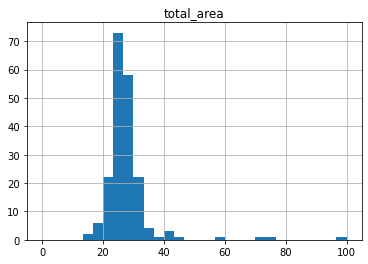

In [31]:
data.loc[data['rooms'] == 0].hist('total_area', bins=30, range=(0, 100))

Большенство квартир с нулевым значением комнат с общей площадью до 50 м², поэтому это скорее всего однокомнатные квартиры. Поэтому заменим нулевые значение rooms в таких объявлениях на 1.

In [32]:
data.loc[(data['rooms'] == 0) & (data['total_area'] < 50), 'rooms'] = 1
data['rooms'].value_counts()

1     8239
2     7940
3     5814
4     1180
5      326
6      105
7       59
8       12
9        8
0        5
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Осталось 5 объявлений с нулевым колличеством комнат. Пока оставляем их.

2.6 Предобработка данных в столбце days_exposition

In [33]:
print(f'Пропущено значений в столбце days_exposition = {(len(data) - data.days_exposition.count())/len(data):,.2%}')

Пропущено значений в столбце days_exposition = 13.42%


In [34]:
data['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [35]:
data['days_exposition'].value_counts()

45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1021.0      1
1362.0      1
1105.0      1
795.0       1
971.0       1
Name: days_exposition, Length: 1141, dtype: int64

In [36]:
data[data['days_exposition'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.75,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.75,22.0,NaN,3,NaN,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
45,17,5200000.0,50.60,2018-12-02T00:00:00,2,2.65,9.0,30.3,7,NaN,...,7.00,0.0,Санкт-Петербург,30011.0,12872.0,0.0,NaN,0.0,NaN,NaN
46,17,6600000.0,52.10,2019-01-31T00:00:00,2,2.60,24.0,29.7,9,NaN,...,8.30,2.0,Санкт-Петербург,15114.0,12702.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23684,20,21400000.0,145.00,2018-11-02T00:00:00,4,3.00,26.0,71.4,17,NaN,...,15.60,0.0,Санкт-Петербург,11827.0,11459.0,0.0,NaN,0.0,NaN,NaN
23685,15,2490000.0,31.00,2019-01-24T00:00:00,1,2.50,5.0,17.3,5,NaN,...,5.60,1.0,Ломоносов,48393.0,51818.0,0.0,NaN,0.0,NaN,NaN
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,0.0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.7,1,NaN,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропущенных значений в столбце days_exposition 13.42%. 

Большой разброс между  min и max значениями days_exposition, а также между средним и медианным значениями. Причину отсутствия информации в столбце days_exposition определить сложно. Может быть, что информации в столбце days_exposition отсутствует, потому что сделка с квартирой не завершена. А может быть, что сделка с квартирой была совершена, а в базу данных информация не внесена. 
Поэтому заполнить пропуски в столбцы средним или медианным значениями будет неверно. Поэтому пропуски в стобце не заполняем.

2.7 Предобработка данных в столбце is_apartment

In [37]:
print(f'Пропущено значений в столбце is_apartment = {(len(data) - data.is_apartment.count())/len(data):,.2%}')

Пропущено значений в столбце is_apartment = 88.29%


In [38]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

Пропущенных значений в столбце is_apartment очень много 88.29%. 

Возможно, что продавцы квартир при заполнении формы для создания объявления пропускали этот пункт, потому что не продавали апартаменты, или не понимали разницы между апартаментами и обычной квартирой. 

Будем считать, квартиры с пропусками в столбце is_apartment не являются апартаментами. Все пропущенные значения заменим на False.

In [39]:
data['is_apartment'] = data['is_apartment'].fillna(False)

In [40]:
data['is_apartment'].isna().sum()

0

2.8 Предобработка данных в столбце living_area

In [41]:
print(f'Пропущено значений в столбце living_area = {(len(data) - data.living_area.count())/len(data):,.2%}')

Пропущено значений в столбце living_area = 8.03%


In [42]:
data['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [43]:
data['living_area'].value_counts()

18.00     882
17.00     675
30.00     598
16.00     486
20.00     481
         ... 
76.70       1
39.41       1
124.90      1
36.07       1
42.55       1
Name: living_area, Length: 1782, dtype: int64

In [44]:
data[data['living_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.60,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.75,24.0,NaN,22,False,...,18.9,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.55,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,False,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.75,22.0,NaN,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,NaN,5,False,...,NaN,0.0,Колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,False,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,False,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.00,2017-12-08T00:00:00,1,2.55,9.0,NaN,4,False,...,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Пропущенных значений в столбце living_area 8.03%. 

Если посмотреть на данные с пропущенными значениями жилой площади living_area, то ничего общего между ними нет. Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Данные невозможно восстановить на основе имеющейся информации. Пропуски не заполнияем.

2.9 Предобработка данных в столбце kitchen_area

In [45]:
print(f'Пропущено значений в столбце kitchen_area = {(len(data) - data.kitchen_area.count())/len(data):,.2%}')

Пропущено значений в столбце kitchen_area = 9.61%


In [46]:
data['kitchen_area'].describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [47]:
data['kitchen_area'].value_counts()

6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
53.10       1
12.56       1
11.84       1
13.27       1
13.83       1
Name: kitchen_area, Length: 971, dtype: int64

In [48]:
data[data['kitchen_area'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
30,12,2200000.0,32.8,2018-02-19T00:00:00,1,2.55,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,10,1990000.0,45.8,2017-10-28T00:00:00,2,2.50,5.0,NaN,1,False,...,NaN,0.0,поселок городского типа Красный Бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,13,5350000.0,40.0,2018-11-18T00:00:00,1,2.75,22.0,NaN,3,False,...,NaN,1.0,Санкт-Петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
59,15,6300000.0,46.5,2017-03-06T00:00:00,1,2.70,13.0,NaN,13,False,...,NaN,0.0,Санкт-Петербург,11125.0,14501.0,0.0,NaN,0.0,NaN,336.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23655,1,2414306.0,40.5,2016-09-08T00:00:00,1,2.56,18.0,19.6,10,False,...,NaN,0.0,Никольское,NaN,NaN,NaN,NaN,NaN,NaN,627.0
23663,12,6400000.0,88.0,2018-01-12T00:00:00,4,2.55,10.0,NaN,1,False,...,NaN,0.0,Санкт-Петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,9,2450000.0,45.6,2018-02-08T00:00:00,1,2.80,9.0,NaN,2,False,...,NaN,0.0,поселок городского типа Синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,0,2500000.0,35.0,2017-12-08T00:00:00,1,2.55,9.0,NaN,4,False,...,NaN,0.0,Сосновый Бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Пропущенных значений в столбце kitchen_area 9.61%. 

В данных с пропущенными значениями площади кухни kitchen_area ничего общего нет. Причина такая же как и с общей площадью: данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Данные невозможно восстановить на основе имеющейся информации. Пропуски не заполнияем.

2.10 Предобработка данных в столбце airports_nearest

In [49]:
print(f'Пропущено значений в столбце airports_nearest = {(len(data) - data.airports_nearest.count())/len(data):,.2%}')

Пропущено значений в столбце airports_nearest = 23.38%


In [50]:
data['airports_nearest'].describe()

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [51]:
data['airports_nearest'].value_counts()

37434.0    61
21928.0    32
44870.0    30
39946.0    30
18732.0    27
           ..
32366.0     1
13024.0     1
52394.0     1
20007.0     1
24665.0     1
Name: airports_nearest, Length: 8275, dtype: int64

In [52]:
data[data['airports_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.55,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.55,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.55,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.70,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропущенных значений в столбце airports_nearest много 23.38%. 

В строках с пропущенными значениями не прослеживается ничего общего. Их нельзя отнести к одной конкретной категории.
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. 
Данные невозможно восстановить на основе имеющейся информации. Оставляем пропуски как есть.

2.11 Предобработка данных в столбце citycenters_nearest

In [53]:
print(f'Пропущено значений в столбце citycenters_nearest = {(len(data) - data.citycenters_nearest.count())/len(data):,.2%}')

Пропущено значений в столбце citycenters_nearest = 23.29%


In [54]:
data['citycenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: citycenters_nearest, dtype: float64

In [55]:
data['citycenters_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
20444.0    27
8434.0     27
           ..
16631.0     1
24311.0     1
15782.0     1
11940.0     1
6263.0      1
Name: citycenters_nearest, Length: 7642, dtype: int64

Пропущено значений в столбце cityCenters_nearest много 23.29%.

Строки с пропущенными значениями нельзя отнести к одной конкретной категории: разные даты заявлений, разные цены и расположения квартир. Данные пропущены как для квартир в городах, так и для поселков и сел.
Данные могли не внести составители заявления или значения могли быть утеряны в результате сбоя при загрузке данных в базу. 
По имеющейся информации данные невозможно восстановить. На данном этапе оставим пропуски как есть.

2.12 Предобработка данных в столбце parks_nearest

In [56]:
print(f'Пропущено значений в столбце parks_nearest = {(len(data) - data.parks_nearest.count())/len(data):,.2%}')

Пропущено значений в столбце parks_nearest = 65.91%


In [57]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [58]:
data['parks_nearest'].value_counts()

441.0     67
173.0     41
392.0     41
456.0     40
471.0     32
          ..
3.0        1
2847.0     1
1443.0     1
7.0        1
2984.0     1
Name: parks_nearest, Length: 995, dtype: int64

In [59]:
data[data['parks_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.75,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.66,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.75,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.30,7,False,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.55,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.70,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропущено значений в столбце parks_nearest очень много 65.91%.

Возможно данные пропущены при заполнении или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Если посмотреть на данные с пропущенными значениями в parks_nearest, то ничего общего между ними нет. Пропущенные значения не заполняем, а оставляем как есть.

2.13 Предобработка данных в столбце parks_around3000

In [60]:
print(f'Пропущено значений в столбце parks_around3000 = {(len(data) - data.parks_around3000.count())/len(data):,.2%}')

Пропущено значений в столбце parks_around3000 = 23.28%


In [61]:
data['parks_around3000'].describe()

count    18181.000000
mean         0.611408
std          0.802074
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

In [62]:
data['parks_around3000'].value_counts()

0.0    10106
1.0     5681
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64

In [63]:
data[data['parks_around3000'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.55,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.55,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.55,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.70,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропусков в столбце parks_around3000 достаточно много 23.28%. 

Строки с пропущенными значениями нельзя отнести к одной конкретной категории.
Возможно, что пропуски остались по причине отсутствия парков в радиусе 3 км, поэтому заменим их на 0.

In [64]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'].isna().sum()

0

2.14 Предобработка данных в столбце ponds_nearest

In [65]:
print(f'Пропущено значений в столбце ponds_nearest = {(len(data) - data.ponds_nearest.count())/len(data):,.2%}')

Пропущено значений в столбце ponds_nearest = 61.56%


In [66]:
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

In [67]:
data['ponds_nearest'].value_counts()

427.0     70
454.0     41
153.0     40
433.0     39
474.0     37
          ..
150.0      1
967.0      1
131.0      1
1164.0     1
1134.0     1
Name: ponds_nearest, Length: 1096, dtype: int64

In [68]:
data[data['ponds_nearest'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.75,11.0,18.60,1,False,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.66,26.0,10.60,6,False,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.75,24.0,NaN,22,False,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,NaN,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,2.55,5.0,31.00,2,False,...,6.00,0.0,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.55,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,0.0,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.70,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Пропущено значений в столбце ponds_nearest очень много 61.56%%.

Возможно данные пропущены при заполнении или значения могли быть утеряны в результате сбоя при загрузке данных в базу. Если посмотреть на данные с пропущенными значениями в ponds_nearest, то ничего общего между ними нет. Пропущенные значения не заполняем, а оставляем как есть.

2.15 Предобработка данных в столбце ponds_around3000

In [69]:
print(f'Пропущено значений в столбце ponds_around3000 = {(len(data) - data.ponds_around3000.count())/len(data):,.2%}')

Пропущено значений в столбце ponds_around3000 = 23.28%


In [70]:
data['ponds_around3000'].describe()

count    18181.000000
mean         0.770255
std          0.938346
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

In [71]:
data['ponds_around3000'].value_counts()

0.0    9071
1.0    5717
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64

In [72]:
data[data['ponds_around3000'].isna()]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,...,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,False,...,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.55,5.0,30.00,5,False,...,9.00,0.0,Сертолово,NaN,NaN,0.0,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,False,...,11.00,2.0,деревня Кудрово,NaN,NaN,0.0,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.55,9.0,NaN,2,False,...,NaN,0.0,Коммунар,NaN,NaN,0.0,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.50,3,False,...,5.50,0.0,посёлок Дзержинского,NaN,NaN,0.0,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.55,5.0,17.50,4,False,...,6.00,0.0,Тихвин,NaN,NaN,0.0,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5.0,38.00,4,False,...,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3.0,29.70,1,False,...,NaN,0.0,село Рождествено,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Пропусков в данном столбце ponds_around3000 достаточно много 23.28%. 

Строки с пропущенными значениями нельзя отнести к одной конкретной категории.
Возможно, что пропуски остались по причине отсутствия водоёмов в радиусе 3 км и заменим их на 0.

In [73]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'].isna().sum()

0

2.16 Приведение данных к нужным типам

Данные в столбце first_day_exposition переводим из типа object в тип datetime в формат даты без времени, так как время не указано

In [74]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')

Так как данные в столбцах balcony, last_price, parks_around3000, ponds_around3000 целоцисченные значение, то переводим их    из типа float в тип int

In [75]:
data['balcony'] = data['balcony'].astype('int')

In [76]:
data['parks_around3000'] = data['parks_around3000'].astype('int')

In [77]:
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [78]:
data['last_price'] = data['last_price'].astype('int')

Данные в столбце is_apartment переводим из типа object в тип bool

In [79]:
data['is_apartment'] = data['is_apartment'].astype('bool')

Проверим результат 

In [80]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,citycenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.40,2018-12-04,1,2.75,11.0,18.60,1,False,...,11.00,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.00,2015-08-20,2,2.55,5.0,34.30,4,False,...,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.00,2015-07-24,3,2.60,14.0,NaN,9,False,...,NaN,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,9.10,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000,37.30,2017-11-02,1,2.66,26.0,10.60,6,False,...,14.40,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0
7,5,7915000,71.60,2019-04-18,2,2.75,24.0,NaN,22,False,...,18.90,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN
8,20,2900000,33.16,2018-05-23,1,2.70,27.0,15.43,26,False,...,8.81,0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,6.50,2,Санкт-Петербург,50898.0,15008.0,0,NaN,0,NaN,289.0


In [81]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

None

### Выводы по предобработке данных

1. Для некоторых пропущенных значений нашли логичную замену:

- Пропущенные значения по столбцу ceiling_height заполнили медианными значениями высоты потолков для дома соответствующей этажности. Оставшиеся пропуски значений высоты потолков заполнили медианой по столбцу ceiling_height.

- Пропущенные значения по столбцу balcony заменили на 0, предположив, что скорее всего балконов нет где пропущены значения.

- Пропущенные значения по столбцу rooms с нулевым значением комнат с общей площадью до 50 м² заполнили на 1 как на однокомнатные квартиры.

- Предположили, что квартиры с пропусками в столбце is_apartment не являются апартаментами, и все пропущенные значения заменили на False.

- Пропущенные значения столбца ponds_around3000 заменили на 0, предположив, что пропуски появились по причине отсутствия водоёмов в радиусе 3 км.

Для других типов данных нет подходящих значений на замену. В этом случае правильно было оставить эти значения пустыми. 

2. В ходе выполнения проекта приведены данные к нужным типам.

- Данные в столбце first_day_exposition переведены из типа object в тип datetime в формат даты без времени, так как время не указано.

- Так как данные в столбцах balcony, last_price, parks_around3000, ponds_around3000 целоцисченные значение, то перевели их из типа float в тип int.

- Данные в столбце is_apartment перевели из типа object в тип bool.

###  Шаг 3. Посчитайте и добавьте в таблицу

Цену квадратного метра. 

In [82]:
data['price_per_square_meter'] = data['last_price'] / data['total_area']
data['price_per_square_meter'] = data['price_per_square_meter'].astype('int')

День недели, месяц и год публикации объявления

In [83]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month
data['year_exposition'] = data['first_day_exposition'].dt.year

Этаж квартиры. Варианты — первый, последний, другой

In [84]:
def floor_category(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [85]:
data['floor_category'] = data.apply(floor_category, axis = 1)

Соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [86]:
data['living_total_ratio'] = data['living_area'] / data['total_area']

In [87]:
data['kitchen_tota_ratio'] = data['kitchen_area'] / data['total_area']

In [88]:
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_total_ratio,kitchen_tota_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,2,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.75,11.0,18.60,1,False,...,0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.55,5.0,34.30,4,False,...,2,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.00,2015-07-24,3,2.60,14.0,NaN,9,False,...,3,234.0,424.0,408176,4,7,2015,другой,NaN,NaN
4,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,1,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0,NaN,55.0,95065,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.30,2017-11-02,1,2.66,26.0,10.60,6,False,...,0,NaN,155.0,99195,3,11,2017,другой,0.284182,0.386059
7,5,7915000,71.60,2019-04-18,2,2.75,24.0,NaN,22,False,...,0,NaN,NaN,110544,3,4,2019,другой,NaN,0.263966
8,20,2900000,33.16,2018-05-23,1,2.70,27.0,15.43,26,False,...,0,NaN,189.0,87454,2,5,2018,другой,0.465320,0.265682
9,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557


Исходя из условия задания, метрики посчитаны и добавлены в основную таблицу.

Названия для новых столбцов выбраны, исходя из информации, которая в них хранится.

В новых столбцах есть пропущенные значения в тех записях, где были пропуски исходных данных.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

•	Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

•	Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

•	Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

•	Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

•	Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

•	Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона.

•	Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе?

4.1.1 Проведение исследовательского анализа данных параметра - общая площадь квартиры. Построение гистограммы для общей площади квартиры.

In [89]:
display(data['total_area'].describe())
print('99-й персентиль значений total_area:', round(data['total_area'].quantile(0.99), 1))

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

99-й персентиль значений total_area: 197.2


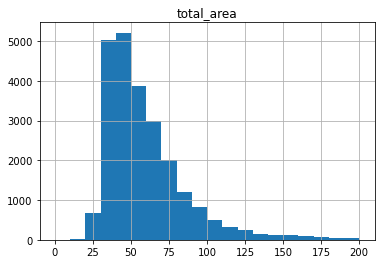

In [90]:
data.hist('total_area', bins=20, range = (0, 200))
plt.show()

Распределение значений параметра total_area близко к распределению Пуассона, без аномальных пиков.
Минимальная площадь 12 м². Это возможно, если продаётся комната.
Максимальное значение - 900 м². Достаточно высокое значение, но также правдоподобное.
99% значений укладывается в отрезке 12 - 197.2 м². Остальные случаи можно считать выбросами.
Медианное значение 52.0 м² меньше среднего 60.3 м², поэтому данные немного смещены влево. Колличество небольших квартир больше, но очень большие по площади вносят вклад в смещение данных.

4.1.2 Проведение исследовательского анализа данных параметра - цена квартиры. Построение гистограммы для цены.

In [91]:
display(data['last_price'].describe())
print('99-й персентиль значений last_price:', round(data['last_price'].quantile(0.99), 1))

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

99-й персентиль значений last_price: 36000000.0


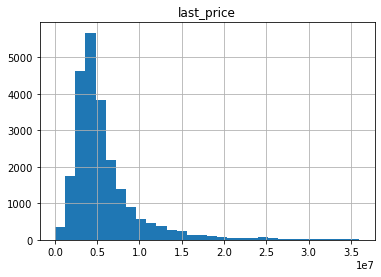

In [92]:
data.hist('last_price', bins=30, range = (0, 3.6*10**7))
plt.show()

Распределение значений параметра last_price близко к распределению Пуассона, без аномальных пиков.
Минимальная цена маленькая 12190, но такое значение возможно. Максимальное значение - 7.6*10^8. Достаточно высокая, но прадоподобная цена. 99% значений меньше 3.6*10^7.  Остальные случаи можно считать выбросами. Медианное значение 4.65*10^6 меньше среднего 6.54*10^6, поэтому данные смещены влево. Колличество дешёвых квартир больше, но очень дорогая недвижимость вносит вклад в смещение данных.

4.1.3 Проведение исследовательского анализа данных параметра - число комнат. Построение гистограммы для числа комнат.

In [93]:
display(data['rooms'].describe())
print('99-й персентиль значений rooms:', round(data['rooms'].quantile(0.99), 1))

count    23699.000000
mean         2.078737
std          1.066509
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

99-й персентиль значений rooms: 5.0


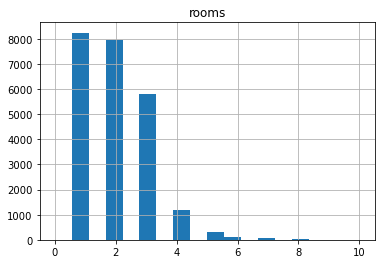

In [94]:
data.hist('rooms', bins=18, range = (0, 10))
plt.show()

Распределение значений параметра rooms близко к распределению Пуассона, без аномальных пиков.
Большенство нулевых значений обработаны ранее. Осталось 5 нулевых значений, которые не внесут большого отклонения распределение. Можно считать их выбросами. Максимальное значение комнат - 19. Достаточно высокое значение, но правдоподобное.
99% значений меньше 5. Остальные случаи можно считать выбросами.
Медианное и среднее значения равны 2, данные практически не смещены, так как абсолютное большинство квартир имеют с 1, 2, 3 и 4 комнатами. 

4.1.4 Проведение исследовательского анализа данных параметра - высота потолков. Построение гистограммы для высоты потолков.

In [95]:
display(data['ceiling_height'].describe())
print('99.5-й персентиль значений ceiling_height:', round(data['ceiling_height'].quantile(0.995), 1))
print('0.5-й персентиль значений ceiling_height:', round(data['ceiling_height'].quantile(0.005), 1))

count    23699.000000
mean         2.735650
std          0.994275
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max        100.000000
Name: ceiling_height, dtype: float64

99.5-й персентиль значений ceiling_height: 4.0
0.5-й персентиль значений ceiling_height: 2.5


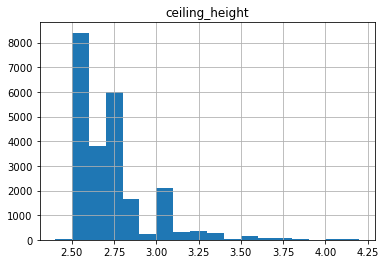

In [96]:
data.hist('ceiling_height', bins=18, range = (2.4, 4.2))
plt.show()

Распределение значений параметра ceiling_height напоминает распределение Пуассона. Есть небольшое аномальное поведение около значения 3 м. Возможно округляли высоту до 3 м, когда реальная высота близкая к 3 м. Максимальное значение - 100 м, ошибочное, но таких значений мало: 99% значений меньше 4 м. Остальные случаи можно считать выбросами, они не внесят отклонение в распределение. Минимальное значение - 1 м, скорее всего тоже ошибочное, но таких значений мало: 99% значений больше 2.5 м. Значения менее 2.5 можно считать выбросами, они не внесут большого отклонения в распределение.
Медианное и среднее значения равны 2.65 и 2.74 соответственно. Данные практически не смещены, так как абсолютное большинство квартир имеют высоту потолков 2.5 - 4.0 м. Разброс значений небольшой. 

4.2  Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

In [97]:
display(data['days_exposition'].describe())
print('99-й персентиль значений days_exposition:', round(data['days_exposition'].quantile(0.99), 1))
print('1-й персентиль значений days_exposition:', round(data['days_exposition'].quantile(0.01), 1))

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

99-й персентиль значений days_exposition: 1068.7
1-й персентиль значений days_exposition: 4.0


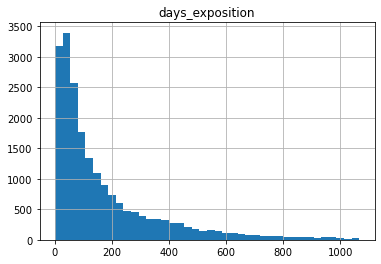

In [98]:
data.hist('days_exposition', bins=40, range=(0,1067))
plt.show()

Более детально посмотрим на основную часть распределения

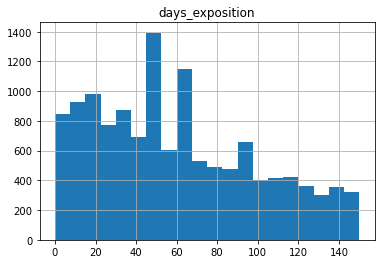

In [99]:
data.hist('days_exposition', bins=20, range=(0,150))
plt.show()

Среднее значение в 2 раза больше медианного. Данные сильно смещены влево. Это означает, что большинство квартир проданы за сравнительно небольшой срок 45 - 232 дней, но есть квартиры, которые очень долго продаются, и вносят смещение в данные. 
1% объявлений были сняты за 4 и меньше дней. Можно считать, что это необычно короткий сроки продажи.

При более детальном рассмотрении основной части распределения видны два пика, которые показывают, что квартиры активно продаются примерно через 1.5 и через 2 месяца с момента подачи объявлений.

Теперь определим, какие сроки можно считать очень долгими. Для начала построим ящик с усами boxplot().

<AxesSubplot:>

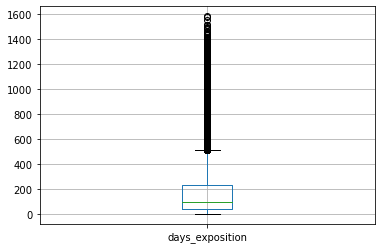

In [100]:
data.boxplot('days_exposition')

Можно оценить, что верхняя граница, после которой данные можно считать выбросами, находится в районе 500 дней. Этот срок можно считать необычно долгим.

4.3 Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

4.3.1 Если рассмотреть высоту потолков в столбцен ceiling_height, то значения менее 2.5 м и более 4.0 м скорее всего ошибочны. Таких даннных около 1%. Их можно удалить без ущерба распределению.

In [101]:
data = data.loc[data['ceiling_height'] >= 2.5]
data = data.loc[data['ceiling_height'] <= 4.0]

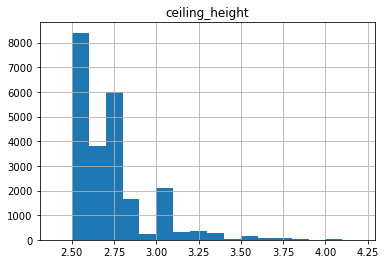

In [102]:
data.hist('ceiling_height', bins=18, range = (2.4, 4.2))
plt.show()

4.3.2 Ранее при обработке данных в столбце rooms нулевые значения количества комнат были заменены на 1 при общей площади квартиры менее 50 м². Осталось еще 5 нулевых значений. Их можно удалить без ущерба для распределения выборки.

In [103]:
data = data.loc[data['rooms'] != 0]
data['rooms'].describe()

count    23546.000000
mean         2.077296
std          1.064441
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

Ранее определили, что 99% объявлений это квартиры с количеством комнат 5 и меньше. Прежде чем удалять объявления с числом комнат более 5 посмотрим на распределение количества объявлений по числу комнат.

In [104]:
data['rooms'].value_counts()

1     8201
2     7886
3     5777
4     1173
5      319
6      102
7       57
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Считаю, правильно будет удалить объявления с числом комнат более 9.

In [105]:
data = data.loc[data['rooms'] <= 9.0]
data['rooms'].describe()

count    23535.000000
mean         2.072233
std          1.036825
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          9.000000
Name: rooms, dtype: float64

4.3.3 Ранее при обработке данных в столбце total_area выяснили, что 99% значений общей площади квартир укладывается в отрезке 12 - 197.2 м². Квартиры с площадью более 197.2 м² можно считать выбросами. Их можно удалить без ущерба для распределения выборки.

In [106]:
data = data.loc[data['total_area'] <= 197.2]

In [107]:
data['total_area'].describe()

count    23320.000000
mean        58.101939
std         26.338999
min         12.000000
25%         40.000000
50%         51.800000
75%         68.812500
max        197.200000
Name: total_area, dtype: float64

4.3.5 Очистим данные от объявлений о продаже квартир, цена которых выше 99% всех объявлений выше 3.610^7 

In [108]:
data = data.loc[data['last_price'] <= 36000000.0]
data['last_price'].describe()

count    2.319800e+04
mean     5.740139e+06
std      4.118806e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.600000e+06
max      3.600000e+07
Name: last_price, dtype: float64

После очистки данных обновим индексы в таблице

In [109]:
data = data.reset_index(drop=True)
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_exposition,month_exposition,year_exposition,floor_category,living_total_ratio,kitchen_tota_ratio
0,20,13000000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,...,2,755.0,NaN,120370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.40,2018-12-04,1,2.75,11.0,18.60,1,False,...,0,NaN,81.0,82920,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.00,2015-08-20,2,2.55,5.0,34.30,4,False,...,2,574.0,558.0,92785,3,8,2015,другой,0.612500,0.148214
3,2,10000000,100.00,2018-06-19,2,3.03,14.0,32.00,13,False,...,1,48.0,121.0,100000,1,6,2018,другой,0.320000,0.410000
4,10,2890000,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0,NaN,55.0,95065,0,9,2018,другой,0.473684,0.299342
5,6,3700000,37.30,2017-11-02,1,2.66,26.0,10.60,6,False,...,0,NaN,155.0,99195,3,11,2017,другой,0.284182,0.386059
6,5,7915000,71.60,2019-04-18,2,2.75,24.0,NaN,22,False,...,0,NaN,NaN,110544,3,4,2019,другой,NaN,0.263966
7,20,2900000,33.16,2018-05-23,1,2.70,27.0,15.43,26,False,...,0,NaN,189.0,87454,2,5,2018,другой,0.465320,0.265682
8,18,5400000,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,0,NaN,289.0,88524,6,2,2017,другой,0.714754,0.106557
9,5,5050000,39.60,2017-11-16,1,2.67,12.0,20.30,3,False,...,2,553.0,137.0,127525,3,11,2017,другой,0.512626,0.214646


4.4 Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

4.4.1 Зависимость цены квадратного метра от общей площади квартиры.

0.16889793505507655

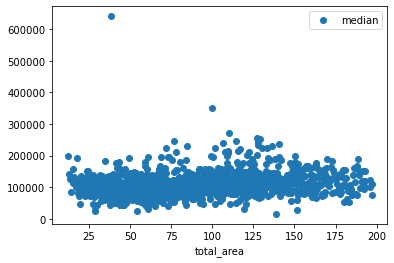

In [110]:
pivot_table_total_area = data.pivot_table(index = 'total_area', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_total_area.columns = ['mean', 'count', 'median']
pivot_table_total_area.plot(y = 'median', style = 'o')
pivot_table_total_area.sort_values('median', ascending = False)
data['total_area'].corr(data['price_per_square_meter'])

Видим очень слабую зависимость цены квадратного метра от общей площади квартиры. Коэффициент корреляции Пирсона низкий 0.299. Чем больше площадь тем немного выше стоимость.

4.4.2 Зависимость цены квадратного метра от числа комнат.

-0.05467445741266873

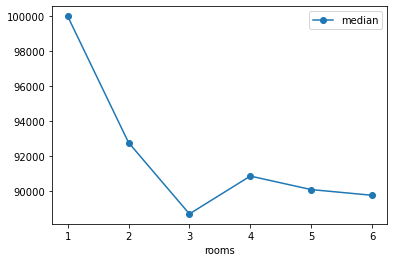

In [111]:
pivot_table_rooms = data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_rooms.columns = ['mean', 'count', 'median']
pivot_table_rooms.query('count > 50').plot(style='o-', y = 'median')
pivot_table_rooms.query('count > 50').sort_values('median', ascending = False)
data['rooms'].corr(data['price_per_square_meter'])

Стоимость квадратного метра уменьшается от однокомнатной квартиры до трехкомнатной, затем увеличевается с увеличением количества комнат. Причем цена на квадратный метр за четырехкомнатные квартиры выше, чем на пяти и шестикомнатные. Минимальная стоимость квадратного метра для трехкомнатных квартир. 

4.4.3 Зависимость цены квадратного метра от удалённости от центра.

-0.38003072869558846

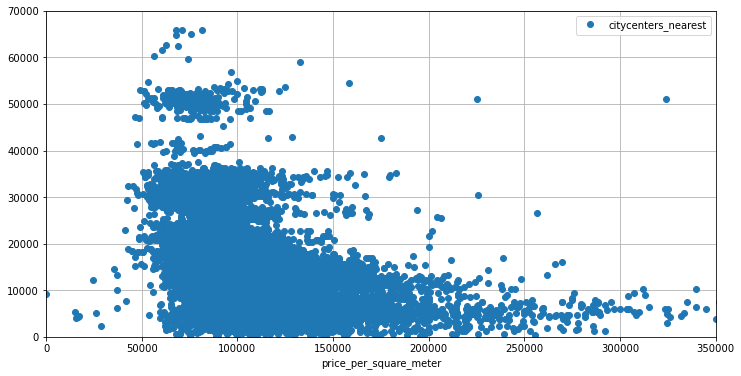

In [112]:
data.plot(x='price_per_square_meter', y='citycenters_nearest', ylim=(0, 70000), xlim=(0, 350000), style='o', grid=True,  figsize=(12, 6))
data['citycenters_nearest'].corr(data['price_per_square_meter'])

График показывает, что в стоимость квадратного метра квартиры падает с увеличением расстояния до центра.
Коэффициент корреляции Пирсона -0.38 также подтверждает отрицательную зависимость. Значение коэффициента низкое, зависимость между параметрами достаточно слабая.

4.4.4 Зависимость цены квадратного метра от того, на каком этаже расположена квартира: первом, последнем или другом.

<AxesSubplot:xlabel='floor_category'>

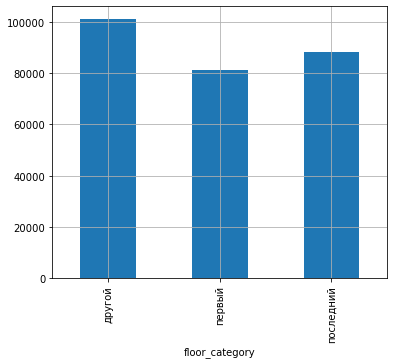

In [113]:
floor_category_mean = data.groupby('floor_category')['price_per_square_meter'].mean()
floor_category_mean.plot(x=floor_category_mean.index, y=floor_category_mean.values, kind='bar', grid=True, figsize=(6,5))

Гистограмма показывает, что меньше всего цена квадратного метра для для квартир на первом этаже. Средняя цена квадратного метра для для квартир на последнем этаже. Самая высокая цена квадратного метра для квартир для категории этажа "другой".

4.4.5 Зависимость цены квадратного метра от даты размещения: дня недели, месяца и года.

Зависимость цены квадратного метра от даты размещения: дня недели.

,mean,count,median
weekday_exposition,,,
1,97223.132554,4104,95340.5
2,97584.208280,3889,95263.0
3,96719.421569,4182,94822.5
4,96861.141656,3925,94444.0
6,95926.927240,1663,94405.0
0,97210.197796,3539,94318.0
5,94796.401899,1896,92938.5


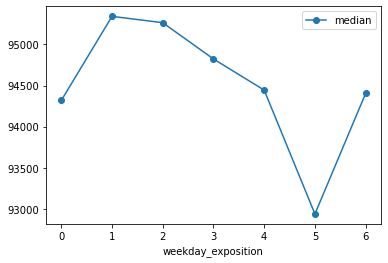

In [114]:
pivot_table_weekday_exposition = data.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_weekday_exposition.columns = ['mean', 'count', 'median']
pivot_table_weekday_exposition.plot(style='o-', y = 'median')

pivot_table_weekday_exposition.sort_values('median', ascending = False)

Во вторник выставлены объявления о прадаже квартир с несколько более высокой стоимостью кварратного метра. По субботам стоимость квартир в обьявлениях самая низкая. Возможно это зависит от более высокой общей активности людей в рабочие дни.

Зависимость цены квадратного метра от даты размещения: месяца.

,mean,count,median
month_exposition,,,
4,98782.639674,2334,95954.0
8,97630.016393,1708,95538.5
9,97544.072239,1938,95334.0
11,96987.674449,2313,95192.0
1,97771.138283,1468,95073.0
3,96945.563314,2535,95029.0
2,96318.292730,2586,94827.0
7,96374.722659,1655,94632.0
10,96214.186246,2094,94118.5


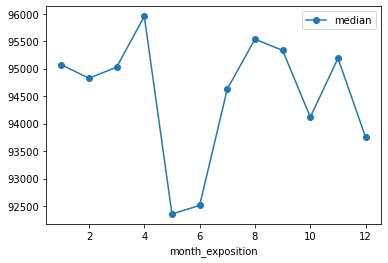

In [115]:
pivot_table_month_exposition = data.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_month_exposition.columns = ['mean', 'count', 'median']
pivot_table_month_exposition.plot(style='o-', y = 'median')

pivot_table_month_exposition.sort_values('median', ascending = False)

Самая высокая стоимость квадратного метра в апреле и августе. Самая низкая стоимость в мае и июне. На рынке недвижимости присутствует сезонность. Возможно связано с отпусками.

Зависимость цены квадратного метра от даты размещения: года.

,mean,count,median
year_exposition,,,
2014,114205.853846,130,106265.5
2019,104674.373362,2823,103067.0
2018,96628.015495,8390,95626.5
2015,97813.310526,1140,92518.5
2017,94648.621392,8003,92113.0
2016,94551.996313,2712,91325.0


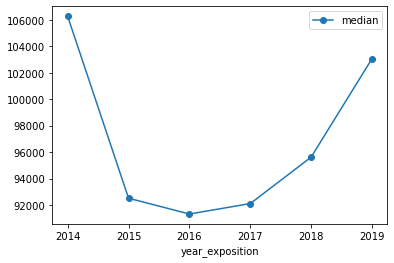

In [116]:
pivot_table_year_exposition = data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
pivot_table_year_exposition.columns = ['mean', 'count', 'median']
pivot_table_year_exposition.plot(style='o-', y = 'median')

pivot_table_year_exposition.sort_values('median', ascending = False)

С 2014 до 2016 года цена квадратного метра квартир падала, а после 2016 года начала увеличиваться. Причем 2014 с высоким значение стоимости квадратного метра не показательный, так как базе данных велась не сначала года и имеет всего 130 записей за этот год.     

4.5  Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце locality_name.

In [117]:
good_data = (data.groupby(by='locality_name').agg({'first_day_exposition': 'count', 'price_per_square_meter':'mean'})
.sort_values(by = 'first_day_exposition', ascending=False).head(10))
display(good_data)

,first_day_exposition,price_per_square_meter
locality_name,,
Санкт-Петербург,15292,111195.184933
посёлок Мурино,520,85724.784615
посёлок Шушары,440,78676.904545
Всеволожск,396,68669.992424
Пушкин,360,103075.475000
Колпино,336,75352.047619
посёлок Парголово,325,90361.923077
Гатчина,306,68757.225490
деревня Кудрово,299,92473.086957


Самая высокая средняя цена квадратного метра жилья в Санкт-Петербурге: 111195.18 за квадратный метр.
Самая низкая средняя цена квадратного метра жилья в Выборге: 58189.71 за квадратный метр

4.6 Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге (locality_name). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется, — это и будет центральная зона

,price_per_square_meter
citycenters_nearest_km,
0.0,164014.388889
1.0,145178.384615
2.0,127881.424242
3.0,117333.173653
4.0,126901.856260
5.0,133483.718676
6.0,135815.308257
7.0,136312.753968
8.0,123884.871134


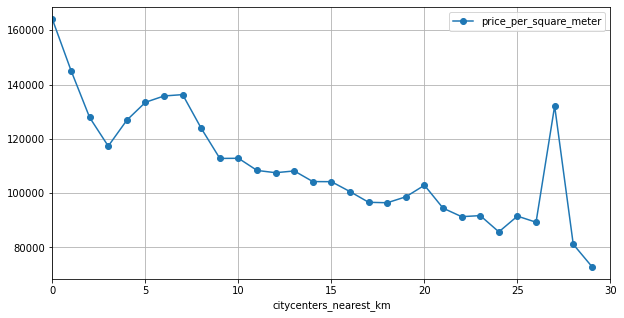

In [118]:
data['citycenters_nearest_km'] = data['citycenters_nearest']/1000
data['citycenters_nearest_km'] = data['citycenters_nearest_km'].fillna(999999)
data['citycenters_nearest_km'] = data['citycenters_nearest_km'].round()
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and citycenters_nearest_km != 999999').pivot_table(index = 'citycenters_nearest_km', values = 'price_per_square_meter', aggfunc = 'mean')
pivot_table_km.plot(style='o-', xlim=(0, 30), grid=True, figsize=(10, 5))
pivot_table_km

Цена квартного метра жилья начинает быстро расти при расстоянии до центра менее 3 км. Это и будет центральная зона. От 3 км до 7 км от центра города наблюдается некоторый рост средней цены квадратного метра жилья.  Начиная с 7 км от центра цены квадратного метра жилья уменьшается с удалённостью от центра. Только на 27 км наблюдается значительный рост цены квадратного метра жилья. Скорее всего это зона загородного элитного жилья.

4.7 Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всей базе? 

Выделим сегмент квартир в центре, беря за радиус 3 км

In [119]:
center_spb_data = data.query('citycenters_nearest_km <= 3 and locality_name == "Санкт-Петербург"')

4.7.1 Проведение исследовательского анализа данных параметра - общая площадь квартиры для центра Санкт-Петербурга.

In [120]:
display(center_spb_data['total_area'].describe())
print('99-й персентиль значений total_area:', round(center_spb_data['total_area'].quantile(0.99), 1))

count    785.000000
mean      86.743592
std       35.421631
min       12.000000
25%       61.500000
50%       81.000000
75%      105.000000
max      197.000000
Name: total_area, dtype: float64

99-й персентиль значений total_area: 184.5


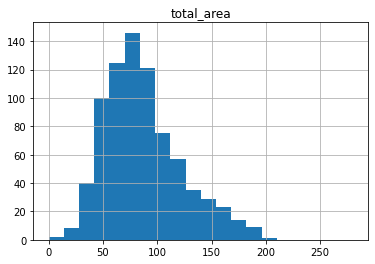

In [121]:
center_spb_data.hist('total_area', bins=20, range = (0, 280))
plt.show()

Распределение значений параметра total_area близко к распределению Пуассона, без аномальных пиков. Минимальная площадь 12 м², как и для всей выборки. Возможно продаётся комната. Максимальное значение в отличии от всей выборки несколько ниже 517 м². 99% значений укладывается в отрезке 12 - 283 м². Остальные случаи можно считать выбросами. Медианное значение 85.0 м² меньше среднего 97.3 м², следовательно, данные немного смещены влево. 
Колличество небольших квартир больше, но очень большие по площади вносят вклад в смещение данных.

4.7.2 Проведение исследовательского анализа данных параметра - цена квартиры для центра Санкт-Петербурга.

In [122]:
display(center_spb_data['last_price'].describe())
print('99-й персентиль значений last_price:', round(center_spb_data['last_price'].quantile(0.99), 1))

count    7.850000e+02
mean     1.075463e+07
std      5.622795e+06
min      2.100000e+06
25%      6.980000e+06
50%      9.200000e+06
75%      1.318000e+07
max      3.550000e+07
Name: last_price, dtype: float64

99-й персентиль значений last_price: 30096000.0


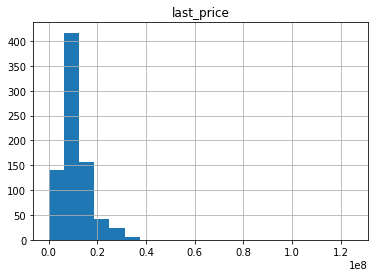

In [123]:
center_spb_data.hist('last_price', bins=20, range = (0, 1.25*10**8))
plt.show()

Распределение значений параметра last_price близко к распределению Пуассона, без аномальных пиков. Минимальная цена 12190, достаточно маленькое значенипе, но возможное значение. Максимальное значение - 7.63*10^8 достаточно высокое, но также правдоподобное. 99% значений меньше 1.25*10^8. Остальные случаи можно считать выбросами. Медианное значение 9.5*10^6 намного больше среднего 1.59*10^7, следовательно, данные смещены вправо. Дорогих квартир больше.

4.7.3 Проведение исследовательского анализа данных параметра - число комнат для центра Санкт-Петербурга.

In [124]:
display(center_spb_data['rooms'].describe())
print('99-й персентиль значений rooms:', round(center_spb_data['rooms'].quantile(0.99), 1))

count    785.000000
mean       2.937580
std        1.240238
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        8.000000
Name: rooms, dtype: float64

99-й персентиль значений rooms: 7.0


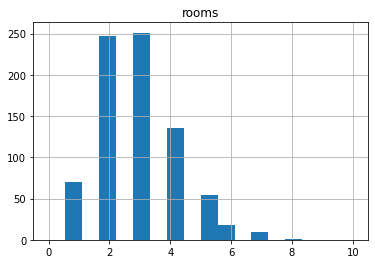

In [125]:
center_spb_data.hist('rooms', bins=18, range = (0, 10))
plt.show()

Как и для общей выборки распределение значений параметра rooms для центра Санкт-Петербурга близко к распределению Пуассона.
Нулевых значений уже нет. Максимальное значение  как и на общей выборке - 8. 99% значений меньше 7. Остальные случаи можно считать выбросами. В отличи от общей выборки медианное и среднее значения равны 3, а не 2.

4.7.4 Проведение исследовательского анализа данных параметра - высота потолков для центра Санкт-Петербурга.

In [126]:
display(center_spb_data['ceiling_height'].describe())
print('99.5-й персентиль значений ceiling_height:', round(center_spb_data['ceiling_height'].quantile(0.995), 1))
print('0.5-й персентиль значений ceiling_height:', round(center_spb_data['ceiling_height'].quantile(0.005), 1))

count    785.000000
mean       3.056038
std        0.345924
min        2.500000
25%        2.800000
50%        3.000000
75%        3.300000
max        4.000000
Name: ceiling_height, dtype: float64

99.5-й персентиль значений ceiling_height: 4.0
0.5-й персентиль значений ceiling_height: 2.5


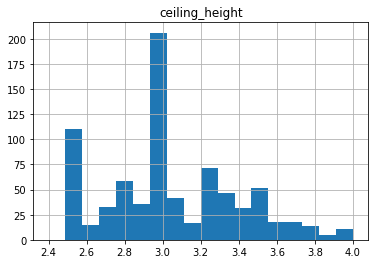

In [127]:
center_spb_data.hist('ceiling_height', bins=18, range = (2.4, 4.0))
plt.show()

В отличии от общей выборки распределение значений параметра распределение значений параметра ceiling_height для центра Санкт-Петербурга мало напоминает распределение Пуассона. Есть большое аномальное значение количества квартир с высотой потолков 3 м. Возможно в домах застиойки исторического центра высота около составляла 3 м.
Максимальное значение реальное - 4 м. Минимальное значение реальное - 2.5 м. Большой разброс значений. 

4.7.5 Зависимость стоимости квадратного метра от количества комнат для центра Санкт-Петербурга.

-0.24275291469982826

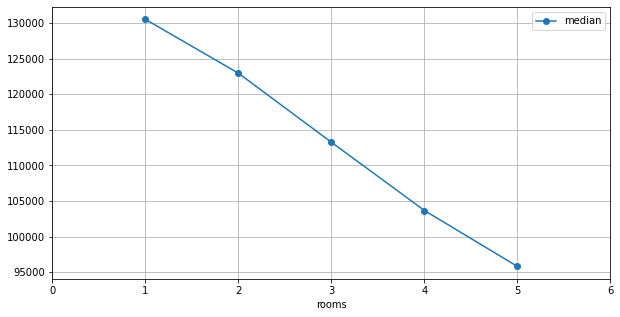

In [128]:
center_spb_rooms = center_spb_data.pivot_table(index = 'rooms', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_rooms.columns = ['mean', 'count', 'median']
center_spb_rooms.query('count > 50').plot(y = 'median', style='o-', xlim=(0, 6), grid=True, figsize=(10, 5))
center_spb_rooms.query('count > 50').sort_values('median', ascending = False)
center_spb_data['rooms'].corr(center_spb_data['price_per_square_meter'])

В отличие от всей выборки, где стоимость квадратного метра квартир уменьшается от 1-комнатных  к 3-комнатным, а затем растет, в центре Санкт-Перербурга чем меньше комнат, тем дороже стоимость метра квадратного. Однако коэффициент корреляции  показывает, что такой связи нет.

4.7.6 Зависимость стоимости квадратного метра от этажа.

<AxesSubplot:xlabel='floor_category'>

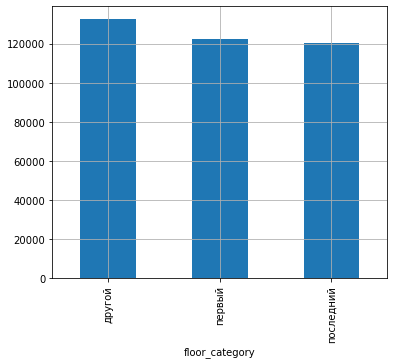

In [129]:
floor_category_mean = center_spb_data.groupby('floor_category')['price_per_square_meter'].mean()
floor_category_mean.plot(x=floor_category_mean.index, y=floor_category_mean.values, kind='bar', grid=True, figsize=(6,5))

В центре Санкт-Перербурга дороже квартиры с категорией этажа "другой". Квартиры на первом этаже и на последнем этаже дешевле и не сильно отличается по цене квардатного метра 

Зависимость стоимости квадратного метра от площади.

4.7.7 Зависимость стоимости квадратного метра от удалённость от центра.

-0.17767748130890268

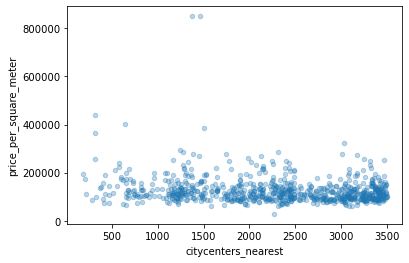

In [130]:
center_spb_data.plot(kind = 'scatter', y = 'price_per_square_meter', x = 'citycenters_nearest', alpha = 0.3)
center_spb_data['citycenters_nearest'].corr(center_spb_data['price_per_square_meter'])

Зависимости нет, так как у нас уже сделана выборка по центру города. Это подтверждает низкий коэффициент корреляции. 

4.7.8 Зависимость стоимости квадратного метра от дата размещения объявления. 

Зависимость стоимости квадратного метра от дня недели размещения объявления.

,mean,count,median
weekday_exposition,,,
5,125324.927273,55,123636.0
0,137047.183333,120,119922.5
2,132388.886364,132,119163.0
4,128183.311258,151,117968.0
1,127881.163793,116,110254.5
6,127568.529412,51,109574.0
3,118297.662500,160,108027.5


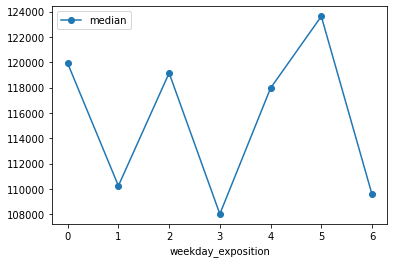

In [131]:
center_spb_weekday_exposition = center_spb_data.pivot_table(index = 'weekday_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_weekday_exposition.columns = ['mean', 'count', 'median']
center_spb_weekday_exposition.plot(style='o-', y = 'median')

center_spb_weekday_exposition.sort_values('median', ascending = False)

Ситуация отличается от всей выборки, минимальные средние цены стоимости квадратного метра в четверг и воскресенье, а самые высокие в понедельник и субботу.

Зависимость стоимости квадратного метра от месяца размещения объявления.

,mean,count,median
month_exposition,,,
10,132424.453125,64,128008.0
1,134680.653846,52,121353.5
12,136644.892857,56,120857.0
3,129660.794872,78,117409.0
4,145177.298701,77,116119.0
9,117581.623188,69,115151.0
2,124095.659794,97,113070.0
6,125299.270833,48,112313.0
7,122257.347826,69,110650.0


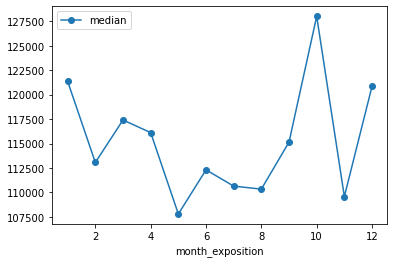

In [132]:
center_spb_month_exposition = center_spb_data.pivot_table(index = 'month_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_month_exposition.columns = ['mean', 'count', 'median']
center_spb_month_exposition.plot(style='o-', y = 'median')

center_spb_month_exposition.sort_values('median', ascending = False)

Как и во всей выборке самая высокая цена квадратного метра в центре Санкт-Петербурге в апреле, низкая мае и июне. В отличии от всей выборки низкой остается цена квадратного метра в центре Санкт-Петербурга в июле и августе. В Санкт-Петербурге на рынке недвижимости  сезонность, возможно связанная с отпусками, длится дольше. Но самая высокая цена квадратного метра в центре Санкт-Петербурге в октябре и декабре.

Зависимость стоимости квадратного метра от года размещения объявления.

,mean,count,median
year_exposition,,,
2014,225010.250000,4,207693.5
2019,150757.633333,90,128537.0
2018,133699.187500,224,121903.5
2017,120677.722807,285,113941.0
2016,118858.179245,106,103336.5
2015,118794.973684,76,101020.0


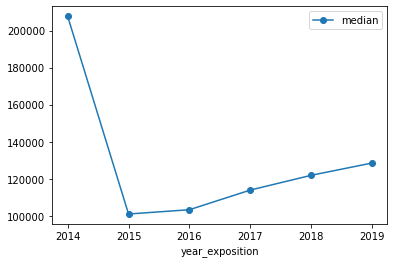

In [133]:
center_spb_year_exposition = center_spb_data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.plot(style='o-', y = 'median')

center_spb_year_exposition.sort_values('median', ascending = False)

График показавает, что цена квадратного метра жилья в центре Санкт-Петербурге в 2014 году в разы превышает цену квадратного метра 2015-2019 годах. Однако таких сделок в 2014 году всего 9, поэтому не являются показательными. Еще раз получим зависимость стоимости квадратного метра от года размещения объявления без 2014 года.

,mean,count,median
year_exposition,,,
2019,150757.633333,90,128537.0
2018,133699.187500,224,121903.5
2017,120677.722807,285,113941.0
2016,118858.179245,106,103336.5
2015,118794.973684,76,101020.0


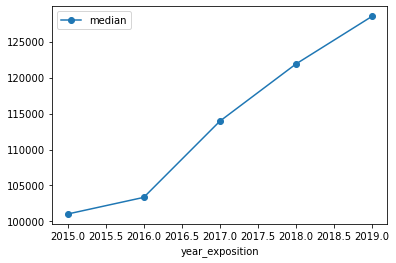

In [134]:
center_spb_year_exposition = center_spb_data.pivot_table(index = 'year_exposition', values = 'price_per_square_meter', aggfunc = ['mean', 'count', 'median'])
center_spb_year_exposition.columns = ['mean', 'count', 'median']
center_spb_year_exposition.query('count > 10').plot(style='o-', y = 'median')

center_spb_year_exposition.query('count > 10').sort_values('median', ascending = False)

График показывает, что цена квадратного метра квартир в центре Санкт-Петербурга начиная с 2015 года постоянно увеличиваться 

### Шаг 5. Общий вывод

1. В работе обработали полученный архив данных объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет.  Первое знакомство с данными показло, что необходимо провести сначала предобработку данных.


2. В ходе выполнения проекта проведена предобработка данных.

Для некоторых пропущенных значений нашли логичную замену:

- Пропущенные значения по столбцу ceiling_height заполнили медианными значениями высоты потолков для дома соответствующей этажности. Оставшиеся пропуски значений высоты потолков заполнили медианой по столбцу ceiling_height.

- Пропущенные значения по столбцу balcony заменили на 0, предположив, что скорее всего балконов нет где пропущены значения.

- Пропущенные значения по столбцу rooms с нулевым значением комнат с общей площадью до 50 м² заполнили на 1 как на однокомнатные квартиры.

- Предположили, что квартиры с пропусками в столбце is_apartment не являются апартаментами, и все пропущенные значения заменили на False.

- Пропущенные значения столбца ponds_around3000 заменили на 0, предположив, что пропуски появились по причине отсутствия водоёмов в радиусе 3 км.

Для других типов данных нет подходящих значений на замену. В этом случае правильно было оставить эти значения пустыми.

В ходе выполнения проекта приведены данные к нужным типам:

- Данные в столбце first_day_exposition переведены из типа object в тип datetime в формат даты без времени, так как время не указано.

- Так как данные в столбцах balcony, last_price, parks_around3000, ponds_around3000 целоцисченные значение, то перевели их из типа float в тип int.

- Данные в столбце is_apartment перевели из типа object в тип bool.

3. Посчитали и добавили в таблицу цену квадратного метра жилья, вывели из даты дни недели, месяцы и года размещения объявлений, добавили категории по этажам квартир (первый, последний, другой), соотношение жилой и общей площади, а также отношение площади кухни к общей.


4. Проведен исследовательский анализ данных.

- Изучили следующие параметры на наличие выбивающихся значений - площадь, цена, число комнат, высота потолков. Были определены аномалии в данных параметрах.

- Изучили время продажи квартиры. Посчитали среднее и медиану. Определили, что обычно продажа занимает от 45 до 232 дней. Определили, что до 4 дней продажи прошли очень быстро, а более 500 дней срок продажи можно считать необычно долгим. 

- Убрали редкие и выбивающиеся значения в столбцах ceiling_height, rooms, last_price и total_area. 

- Определили какие факторы больше всего влияют на стоимость квартиры.
В ходе исследования выявили, что на стоимость квадратного метра квартиры больше всего влияют количество комнат, этаж квартиры, близость к центру. Незначительно на стоимость квадратного метра влияют день, месяц, год размещения и общая площадь.

- Определили 10 населенных пунктов с наибольшим числом объявлений и посчитайте среднюю цену квадратного метра в этих населённых пунктах. Их этих населенных пунктов самая высокая средняя цена квадратного метра жилья в Санкт-Петербурге, а самая низкая средняя цена квадратного метра жилья в Выборге за квадратный метр.

- Для квартир в Санкт-Петербурге построили график зависимости средней цены  от удалённости от центра в км. Средняя цена квадратного метра жилья уменьшается с удалённостью от центра. По резкому росту изменения цен в зависимости от удаления от центра Санкт-Петербурге выявили центральную зону в радиусе 3 километров.

- Для сегмента квартир в центра Санкт-Петербурге снова изучили параметры: площадь, цена, число комнат, высота потолков. Есть отличия в поведении параметров от аналогичных параметров общей выборки. 
Определили также какие факторы больше всего влияют на стоимость квартиры в центра Санкт-Петербурге.
В ходе исследования выявили, что на стоимость квадратного метра квартиры в центра Санкт-Петербурге больше всего влияют количество комнат и этаж квартиры.  По-прежнему квартиры нв первом этаже имеют самую низкую стоимость. В отличи от общей выборки стоимость кварратного метра однакомнатной квариры самая высокая и уменьшается с ростом числа комнат.  Не значительно на стоимость квадратного метра влияют день, месяц, год размещения объявления и общая площадь квартиры. И в отличи от общей выборки удалённость от центра в 3 км зоне не влияет на стоимость квартир.